## Topic detection using Hugging face model

In [ ]:
# installing the tranformers to use hugging face model
!pip install transformers torch

In [ ]:
# Importing the required Libararies
import torch
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer

In [ ]:
# importing the pipeline
from transformers import pipeline

In [ ]:
# defining the classifier, pipeline, model and setting device on cude to use GPU
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli', device =  'cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# checking the GPU's availability
import torch
print(torch.cuda.is_available())

True


In [ ]:
# loading the CSV data file for topic detection
df = pd.read_csv('reddit_topic_data.csv')

In [ ]:
# defining the labels for topic detection
candidate_labels = ['climate change', 'technology', 'sports', 'finance', 'health',
                    'education', 'gaming', 'politics', 'science', 'entertainment',
                    'music', 'business', 'art', 'food', 'history', 'travel', 'cryptocurrency']

In [ ]:
# def classify_topic(text):
#     result = classifier(text, candidate_labels)
#     return result['labels'][0]

In [ ]:
# df['Predicted_Topic'] = df['Title'].apply(classify_topic)

In [ ]:
# print(df[['Title', 'Predicted_Topic']].head())

Tried to implement the classify topic function to detect topics but it was running for almost 2 hours and received no output, so I have decided to debug that scenario which will reflect in following steps.

In [ ]:
# defining a function to classify
def classify_topic(text):
    result = classifier(text, candidate_labels)
    return result['labels'][0]

In [ ]:
# checking the tile length
df['Title_Length'] = df['Title'].apply(len)
df

,Topic,Title,Body,Subreddit,Score,URL,Date,Title_Length
0,climatechange,The r/climatechange Verified User Flair Program,r/climatechange is a community centered around...,climatechange,44,https://www.reddit.com/r/climatechange/comment...,2022-08-21 20:53:23,47
1,climatechange,"Trump would be an ""Extinction-Level Event"" for...",NaN,climatechange,1119,https://www.juancole.com/2024/11/extinction-tu...,2024-11-05 15:13:39,106
2,climatechange,Experts sound alarm over 'silent genocide' in ...,NaN,climatechange,382,https://www.thecooldown.com/green-business/ind...,2024-11-05 07:45:25,123
3,climatechange,"Giant Storms, Growing Stronger, Inundate an Un...",NaN,climatechange,55,https://www.circleofblue.org/2024/world/giant-...,2024-11-05 17:01:56,61
4,climatechange,Why do so many people who say they're anxious ...,I posted a complaint on the Massachusetts sub ...,climatechange,59,https://www.reddit.com/r/climatechange/comment...,2024-11-05 14:37:49,117
...,...,...,...,...,...,...,...,...
1654,cryptocurrency,MicroStrategy Surpasses Microsoft in 25-Year S...,NaN,CryptoCurrency,406,https://coinpaprika.com/news/microstrategy-sur...,2024-11-02 11:38:14,73
1655,cryptocurrency,"Daily Crypto Discussion - November 3, 2024 (GM...",**Welcome to the Daily Crypto Discussion threa...,CryptoCurrency,32,https://www.reddit.com/r/CryptoCurrency/commen...,2024-11-03 00:00:40,50
1656,cryptocurrency,"""Monero is the cryptocurency of the dark net.""...",NaN,CryptoCurrency,65,https://www.youtube.com/watch?v=G8GEp0aM0dg,2024-11-02 19:27:06,95
1657,cryptocurrency,How to Become a Crypto Research Analyst: Skill...,NaN,CryptoCurrency,0,https://www.analyticsinsight.net/cryptocurrenc...,2024-11-04 04:22:02,57


In [ ]:
# checking the longest titles
titles = df.sort_values(by='Title_Length', ascending=False)
titles

,Topic,Title,Body,Subreddit,Score,URL,Date,Title_Length
842,science,"With the help of AI, researchers confirm Holly...",NaN,science,0,https://www.eurekalert.org/news-releases/1063717,2024-11-05 05:03:30,300
98,climatechange,Climate change is increasing the frequency of ...,NaN,climatechange,138,https://www.ncei.noaa.gov/access/billions/time...,2024-10-28 01:14:48,300
796,science,New study concludes that draught reindeer trai...,NaN,science,26,https://journalhosting.ucalgary.ca/index.php/a...,2024-11-05 07:55:54,299
6,climatechange,"Burning all proven reserves of coal, natural g...",NaN,climatechange,110,https://pubs.rsc.org/en/content/articlelanding...,2024-11-05 08:38:58,298
820,science,"Porphyry copper deposits, sourced from mantle ...",NaN,science,26,https://communities.springernature.com/posts/p...,2024-11-04 20:14:13,298
...,...,...,...,...,...,...,...,...
516,education,Debate maybe?,https://youtu.be/S-PsKSEINzo?si=zJb1fLYAKEL1UT...,education,0,https://www.reddit.com/r/education/comments/1g...,2024-10-29 00:56:13,13
29,climatechange,Current state,Question.. What is current state of global war...,climatechange,7,https://www.reddit.com/r/climatechange/comment...,2024-11-04 12:29:31,13
571,gaming,I’m this old…,NaN,gaming,17899,https://i.redd.it/rj18s1ee9xyd1.jpeg,2024-11-04 17:44:43,13
1487,travel,El Salvador,Hi there\n\n \nHeading to El Salvador in Febr...,travel,0,https://www.reddit.com/r/travel/comments/1gkfb...,2024-11-05 19:40:26,11


In [ ]:
# performing operation on longest titles
longest_titles = list(df[df['Title_Length'] == df['Title_Length'].max()]['Title'])

In [ ]:
longest_titles

['Climate change is increasing the frequency of some types of extremes that lead to billion-dollar disasters — In 2024, through October, cost of U.S. billion-dollar weather and climate disaster events exceeds $61 billion excluding Hurricanes Helene and Milton, which may add $100B or more to 2024 total',
 'With the help of AI, researchers confirm Hollywood is more diverse: Facial recognition technology tracked the amount of time actors appeared on films released between 1980 and 2022, which confrimed increased representation for actors who are women, Black, Hispanic/Latino, East Asian and South Asian.']

In [ ]:
# checking topics for each and checking time for 1 topic

for title in longest_titles:
    start_time = time.time()
    print(classify_topic(title))
    end_time = time.time()
    print(f"Time taken is: {end_time - start_time} seconds")

climate change
Time taken is: 2.0747649669647217 seconds
science
Time taken is: 0.7210021018981934 seconds
business
Time taken is: 0.8797614574432373 seconds
science
Time taken is: 1.4348499774932861 seconds


In [ ]:
# checking time for shortest titles
shortest_titles = list(df[df['Title_Length'] == df['Title_Length'].min()]['Title'])

print(shortest_titles)

for title in shortest_titles:
    start_time = time.time()
    print(classify_topic(title))
    end_time = time.time()
    print(f"Time taken is: {end_time - start_time} seconds")

['Help']
health
Time taken is: 1.4208652973175049 seconds


Based on the observationof longest title and shortest title timing it can be seen that for the longest title the model is taking around 1.3 seconds and for shortest tile model is taking around 0.5 seconds to identify the topics

Here we are using model pipline for topic detection. Now in further steps will try to run the model using its API to check that which one is performing better.

In [ ]:
from google.colab import userdata
my_key = userdata.get('Model')

In [ ]:
import requests

API_URL = "https://api-inference.huggingface.co/models/facebook/bart-large-mnli"
headers = {"Authorization": "Bearer "+ my_key}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()

In [ ]:
output = query({
    "inputs": longest_titles[0],
    "parameters": {"candidate_labels": candidate_labels},
})

In [ ]:
output

{'error': ['Error in `parameters.candidate_labels`: ensure this value has at most 10 items']}

Here API will not work due to their limitation for number of labels, so another idea is to get it done using batch sizes for the entire data and running batches in parallal might reduce the time and increase the preformance of the model.

In [ ]:
# defining a new function with batch sizes

def classify_batch(texts):
    results = classifier(texts, candidate_labels)

    # Extracting the top predicted label for each text in the batch
    return [result['labels'][0] for result in results]

In [ ]:
# defining Batch size to avoid memory overload
batch_size = 16

In [ ]:
# Split the 'Title' column into chunks
batches = [list(df['Title'][i:i + batch_size]) for i in range(0, df.shape[0], batch_size)]
batches[0]

['The r/climatechange Verified User Flair Program',
 'Hours after Trump’s election, Biden moved to limit oil drilling in Arctic National Wildlife Refuge',
 '1.5C is dead. The climate fight isn’t.',
 'I Spent Six Months Selling Solar Panels Door to Door. Here’s the Thing About Renewable Energy.',
 'Is no one discussing the Dünkēlflåüte?',
 'I just need to hear any good news',
 "2024 'Virtually Certain' To Be Hottest Year, Pass 1.5 Degree Threshold",
 'Scientists say the severity of future droughts will be determined largely by how much more planet-heating gases humans release into the atmosphere - Los Angeles Times',
 'Good US college programs for climate science?',
 "Please recommend a good layman's book on climate change.",
 'What are the private flights of the 1% doing to the planet? The numbers are in | CBC News',
 'Acceptance is important ',
 'What are the things that make you feel like you’re actually doing something about climate change?',
 'Good long videos?',
 "Verity - 2024 'V

In [ ]:
# Running the classifier on each batch and collect results
predicted_topics = []
for batch in batches:
    start_time = time.time()
    predicted_topics.extend(classify_batch(batch))
    print('batch done')
    end_time = time.time()
    print(f"Time taken is: {end_time - start_time} seconds")

batch done
Time taken is: 9.952346324920654 seconds
batch done
Time taken is: 8.570271253585815 seconds
batch done
Time taken is: 6.583185195922852 seconds
batch done
Time taken is: 5.659319639205933 seconds


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


batch done
Time taken is: 5.340879440307617 seconds
batch done
Time taken is: 5.825122356414795 seconds
batch done
Time taken is: 5.439833879470825 seconds
batch done
Time taken is: 6.135213851928711 seconds
batch done
Time taken is: 5.219634532928467 seconds
batch done
Time taken is: 5.842773675918579 seconds
batch done
Time taken is: 5.108652114868164 seconds
batch done
Time taken is: 5.516986608505249 seconds
batch done
Time taken is: 5.723273277282715 seconds
batch done
Time taken is: 4.978883981704712 seconds
batch done
Time taken is: 7.755256652832031 seconds
batch done
Time taken is: 5.077054262161255 seconds
batch done
Time taken is: 5.890760183334351 seconds
batch done
Time taken is: 5.030127763748169 seconds
batch done
Time taken is: 5.919211387634277 seconds
batch done
Time taken is: 4.963831186294556 seconds
batch done
Time taken is: 5.264747619628906 seconds
batch done
Time taken is: 5.733339309692383 seconds
batch done
Time taken is: 5.026217699050903 seconds
batch done
T

* Here, it can be seen that for this batch size it is almost taking 5-6 seconds to complete each batch.

* So, here batch size can play a crucial role on performance. To identify that we can try to observe the behaviour with different batch size.

* Trying to create an automated script that will run batches of increasing size, on increments of 5, from 5 to 40 (e.g., 5, 10, 15, 20...)
* The script will record how long it took to run a batch of a given size, and then add that time and the batch size to a dataframe so we have that data.

In [ ]:
# defining classify batch
def classify_batch(texts):
    results = classifier(texts, candidate_labels)

    # Extracting the top predicted label for each text in the batch
    return [result['labels'][0] for result in results]

In [ ]:
# adding colummns in dataset
timing_results = pd.DataFrame(columns=['batch_size', 'seconds'])

In [ ]:
# creating lists to store data
list_batch_size = []
list_time = []

In [ ]:
# creating a script to run different batch size and compare the results
for batch_size in range(5, 45, 5):

    sample_texts = df['Title'][:batch_size].tolist()

    start_time = time.time()
    classify_batch(sample_texts)
    end_time = time.time()

    elapsed_time = end_time - start_time

    list_batch_size.append(batch_size)
    list_time.append(elapsed_time)


    # timing_results = timing_results.append({'batch_size': batch_size, 'seconds': elapsed_time}, ignore_index=True)
    print(f"Batch size {batch_size} processed in {elapsed_time:.2f} seconds")

Batch size 5 processed in 5.28 seconds
Batch size 10 processed in 9.77 seconds
Batch size 15 processed in 9.94 seconds
Batch size 20 processed in 9.09 seconds
Batch size 25 processed in 10.03 seconds
Batch size 30 processed in 15.76 seconds
Batch size 35 processed in 14.85 seconds
Batch size 40 processed in 15.37 seconds


In [ ]:
# storing the data
timing_results = pd.DataFrame({'batch_size': list_batch_size, 'seconds': list_time})

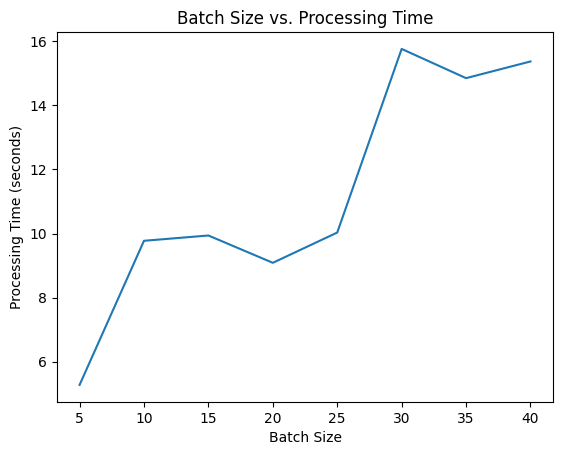

In [ ]:
# creating a chart to observe the difference
plt.plot(timing_results['batch_size'], timing_results['seconds'])
plt.xlabel('Batch Size')
plt.ylabel('Processing Time (seconds)')
plt.title('Batch Size vs. Processing Time')
plt.show()

It can be seen that running it on a various batch size it is taking time whcih is linearly increasing whith the batch size. So, to identify which batch size is ideal to use for efficiency of time we can apply the concept of forward pass to perform the opration parallaly for effective results.

In [ ]:
# usning forward pass method to use the model for better efficiency
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli').to('cuda')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
label_tokens = tokenizer(candidate_labels, padding=True, return_tensors="pt").to('cuda')

In [ ]:
def classify_batch_direct(texts):
    # Tokenize the batch of texts
    #start_time = time.time()
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt').to('cuda')
    # Model inference
    with torch.no_grad():
        logits = model(**inputs).logits
    #stop_time = time.time()
    #print(f"Time taken for batch: {stop_time - start_time} seconds")
    # Calculate similarity with candidate labels and pick the top one
    #scores = torch.matmul(logits, label_tokens.input_ids.T)
    #top_labels = scores.argmax(dim=1)

    # Return predicted labels
    predicted_labels = []
    for logit in logits:
        # Compute similarity with each candidate label (logits are mapped to candidate labels)
        label_scores = torch.nn.functional.softmax(logit, dim=0)

        # Get the label with the highest score
        top_label_idx = label_scores.argmax().item()
        predicted_labels.append(candidate_labels[top_label_idx])

    return predicted_labels

In [ ]:
test_list = list(df['Title'].head(3))

In [ ]:
timing_results = pd.DataFrame(columns=['batch_size', 'seconds'])

In [ ]:
list_batch_size = []
list_time = []

In [ ]:
def timing_experiment():
  list_batch_size = []
  list_time = []

  for batch_size in range(5, 80, 5):
      #code for taking a random sample subset of the dataframe
      current_df = df.sample(n=500)
      sample_texts = current_df['Title'].head(batch_size).tolist()

      start_time = time.time()
      classify_batch_direct(sample_texts)
      end_time = time.time()

      elapsed_time = end_time - start_time

      list_batch_size.append(batch_size)
      list_time.append(elapsed_time)


    # timing_results = timing_results.append({'batch_size': batch_size, 'seconds': elapsed_time}, ignore_index=True)
      #print(f"Batch size {batch_size} processed in {elapsed_time:.2f} seconds")
  timing_results = pd.DataFrame({'batch_size': list_batch_size, 'seconds': list_time})
  return timing_results

In [ ]:
timing_results = timing_experiment()

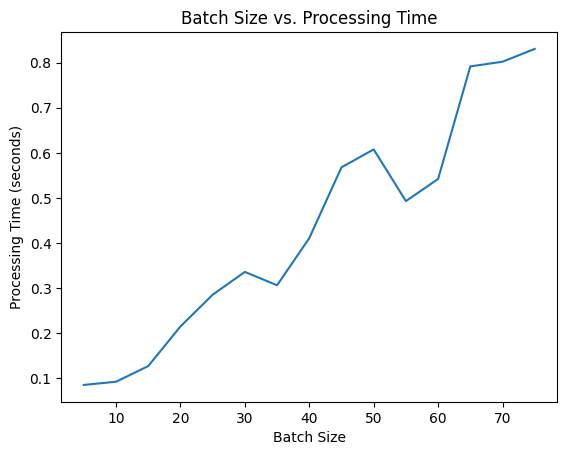

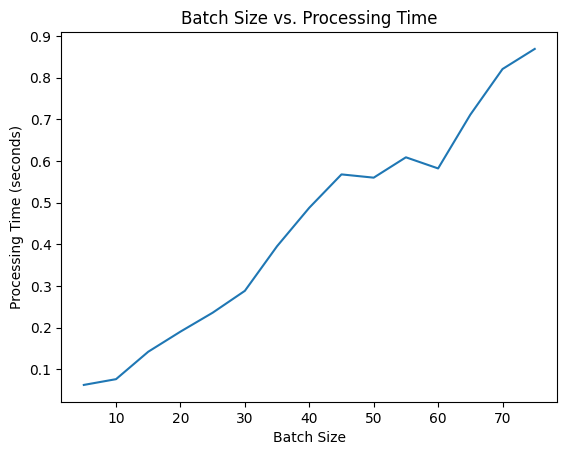

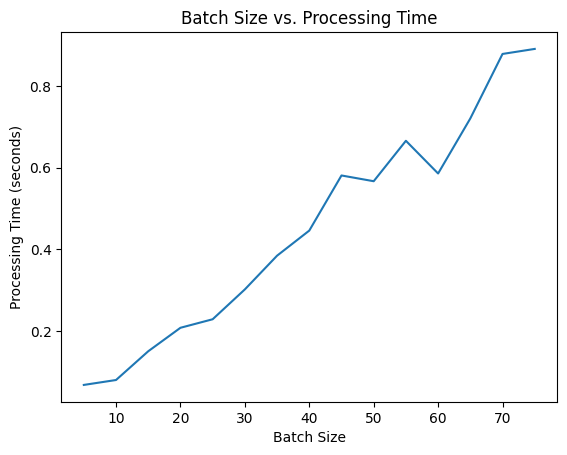

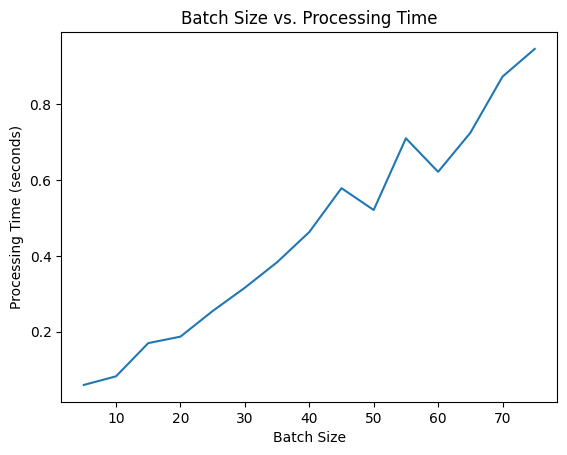

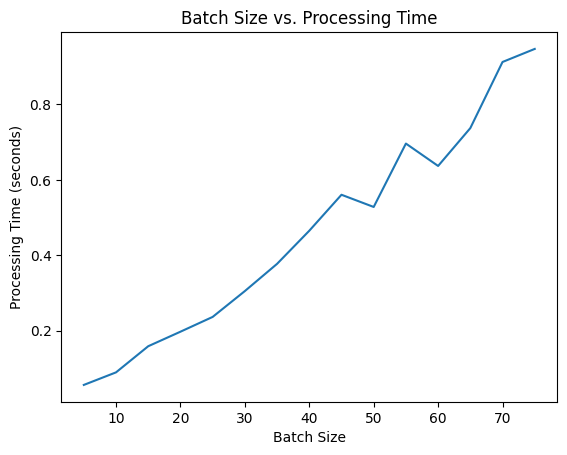

In [ ]:
#  we will use matplotlib to graph batch size vs processing time
for i in range(5):
  if i == 0:
    timing_results = timing_experiment()
  else:
    timing_results['seconds'] = timing_results['seconds'] + timing_experiment()['seconds']
  plt.plot(timing_results['batch_size'], timing_results['seconds']*(1/(i+1)))
  plt.xlabel('Batch Size')
  plt.ylabel('Processing Time (seconds)')
  plt.title('Batch Size vs. Processing Time')
  plt.show()
  #time.sleep(10)

In [ ]:
timing_results['seconds'] = timing_results['seconds']*(1/5)

In [ ]:
timing_results

,batch_size,seconds
0,5,0.017651
1,10,0.031707
2,15,0.021945
3,20,0.063779
4,25,0.057320
5,30,0.065235
6,35,0.065531
7,40,0.094511
8,45,0.114440
9,50,0.135922


For us to calculate the total processing time, for all the data for a given batch, we need to the following calculation:
int(1659/batch_size)*processing_for_batch_size

In [ ]:
timing_results['total_processing_time'] = (1659/timing_results['batch_size'])*timing_results['seconds']

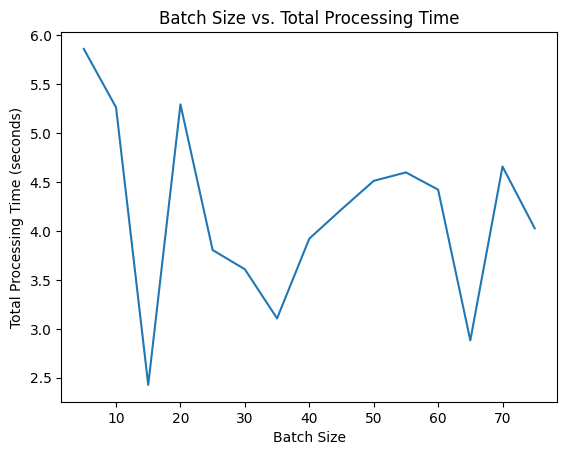

In [ ]:
#graphing total processing time
plt.plot(timing_results['batch_size'], timing_results['total_processing_time'])
plt.xlabel('Batch Size')
plt.ylabel('Total Processing Time (seconds)')
plt.title('Batch Size vs. Total Processing Time')
plt.show()

In [ ]:
timing_results.to_csv('batch_size_timing_results.csv', index=False)

* Based on the expirement we can say that there is a randomness in th results as we have selected data randomly to provide it in batches.

* But in colusion it is ideal to use batch size of 15 to get the effective result with limited amount of time.

### Using batch size of 15 to predict the topics

In [ ]:
# defining a function to predict topics

def predict_topics(df, batch_size=15):

    # Initialize a list to store the detected topics
    detected_topics = []

    # Split dataset into batches and classify each batch
    for i in range(0, len(df), batch_size):
        batch_texts = df['Title'][i:i+batch_size].tolist()

        # Classify batch and extend the detected_topics list with results
        batch_predicted_labels = classify_batch_direct(batch_texts)
        detected_topics.extend(batch_predicted_labels)

        print(f"Processed batch {i // batch_size + 1}/{len(df) // batch_size + 1}")

    # Add detected topics to the DataFrame as a new column
    df['Detected_Topic'] = detected_topics
    return df

In [ ]:
# Predict topics for the data
df = predict_topics(df)

Processed batch 1/111
Processed batch 2/111
Processed batch 3/111
Processed batch 4/111
Processed batch 5/111
Processed batch 6/111
Processed batch 7/111
Processed batch 8/111
Processed batch 9/111
Processed batch 10/111
Processed batch 11/111
Processed batch 12/111
Processed batch 13/111
Processed batch 14/111
Processed batch 15/111
Processed batch 16/111
Processed batch 17/111
Processed batch 18/111
Processed batch 19/111
Processed batch 20/111
Processed batch 21/111
Processed batch 22/111
Processed batch 23/111
Processed batch 24/111
Processed batch 25/111
Processed batch 26/111
Processed batch 27/111
Processed batch 28/111
Processed batch 29/111
Processed batch 30/111
Processed batch 31/111
Processed batch 32/111
Processed batch 33/111
Processed batch 34/111
Processed batch 35/111
Processed batch 36/111
Processed batch 37/111
Processed batch 38/111
Processed batch 39/111
Processed batch 40/111
Processed batch 41/111
Processed batch 42/111
Processed batch 43/111
Processed batch 44/1

In [ ]:
# Show the first few rows of the DataFrame with the detected topics
print(df[['Title', 'Detected_Topic']])

                                                  Title Detected_Topic
0       The r/climatechange Verified User Flair Program     technology
1     Trump would be an "Extinction-Level Event" for...     technology
2     Experts sound alarm over 'silent genocide' in ...     technology
3     Giant Storms, Growing Stronger, Inundate an Un...     technology
4     Why do so many people who say they're anxious ...     technology
...                                                 ...            ...
1654  MicroStrategy Surpasses Microsoft in 25-Year S...     technology
1655  Daily Crypto Discussion - November 3, 2024 (GM...     technology
1656  "Monero is the cryptocurency of the dark net."...     technology
1657  How to Become a Crypto Research Analyst: Skill...     technology
1658   Remember Clucoin Rug pull from a few years ago?      technology

[1659 rows x 2 columns]


In [ ]:
# Save the results to a CSV file
df.to_csv('predicted_topics.csv', index=False)

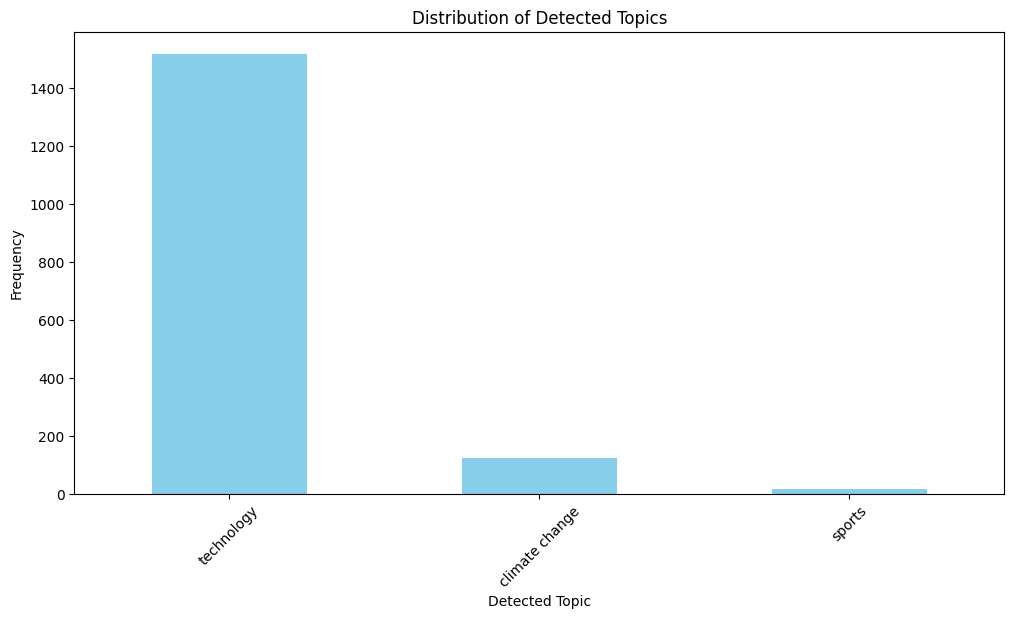

In [ ]:
import matplotlib.pyplot as plt

# Count detected topics
topic_counts = df['Detected_Topic'].value_counts()

# Plot the distribution of detected topics
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Detected Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Detected Topics')
plt.xticks(rotation=45)
plt.show()
